# <font color=red>other</font>

In [2]:
! pip install missingno


# Dataset Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

######################################

import numpy as np
import scipy.stats as sc
import pandas as pd

import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.stats import outliers_influence as oi

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import metrics 


#######################################################

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

######################################

from sklearn.datasets import load_iris
from sklearn import preprocessing

######################################
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 250)
sns.set()

## Basic Info

In [2]:
dsdata = pd.read_excel('Data/full_dataset.xlsx')
dsdata = dsdata.replace('unknown', np.nan)
dsdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
dsdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Input variables:
#### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Variable Description

In [4]:
#describe the "Object" type elements

dsdata.describe(include=['O']) 

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [5]:
#describe the "numerical" type elements

dsdata.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Variable Distribution

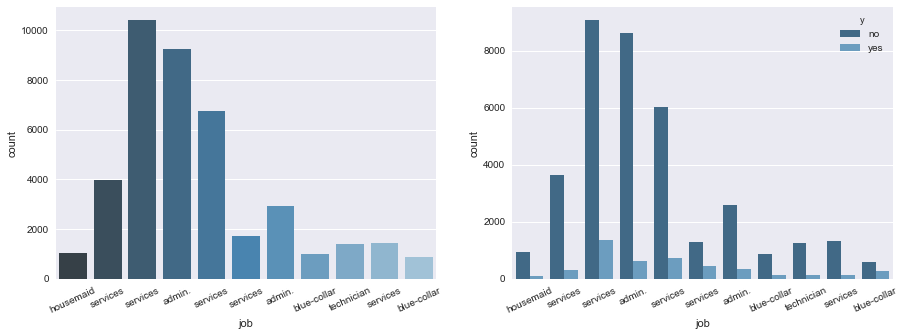

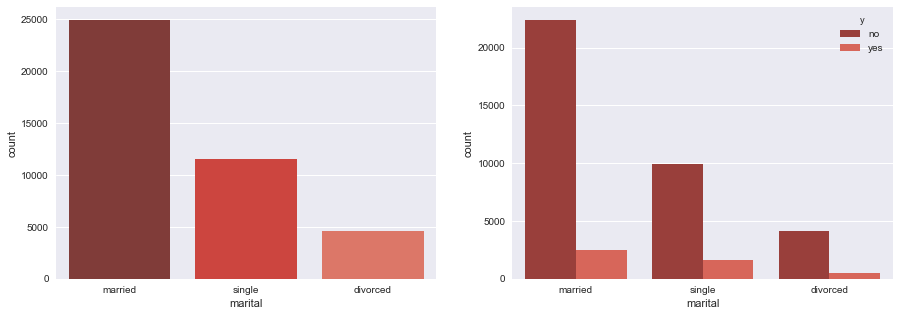

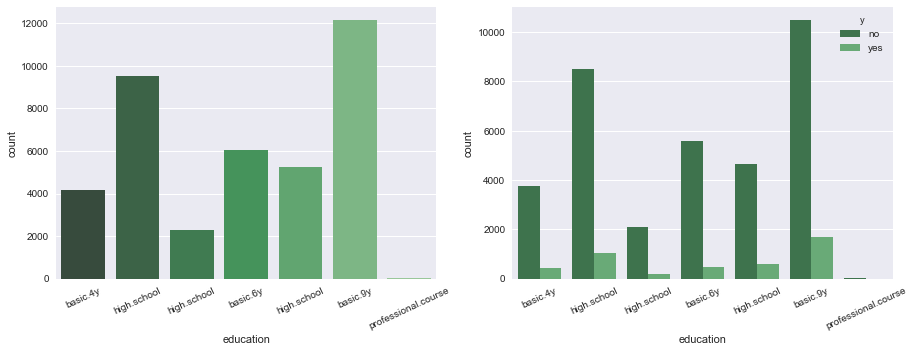

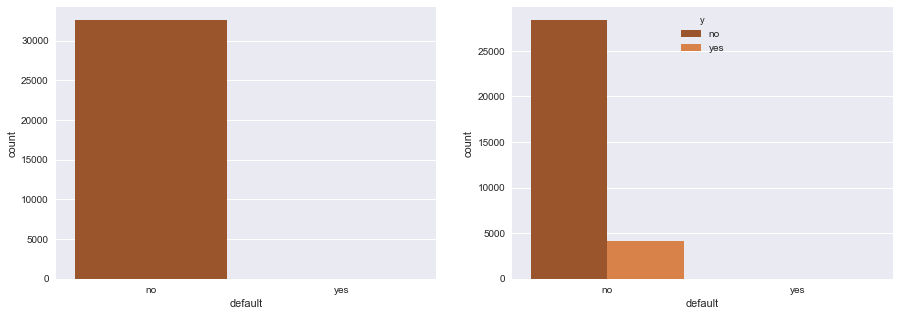

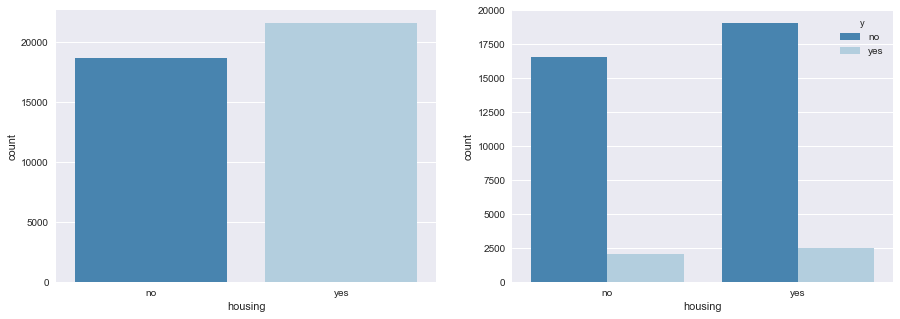

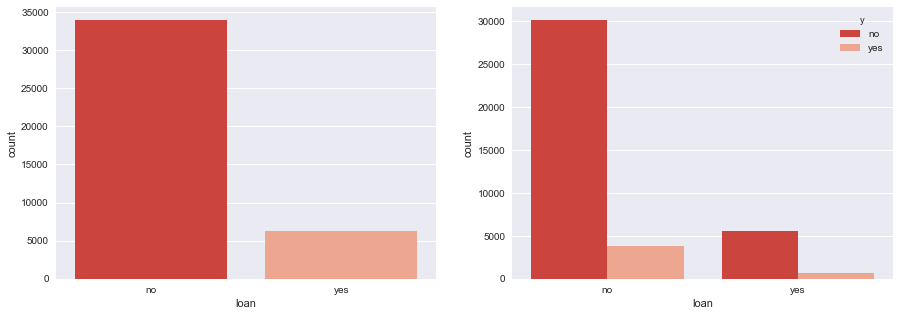

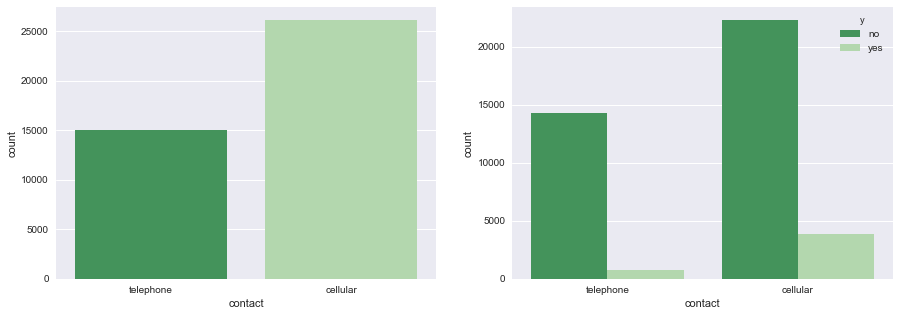

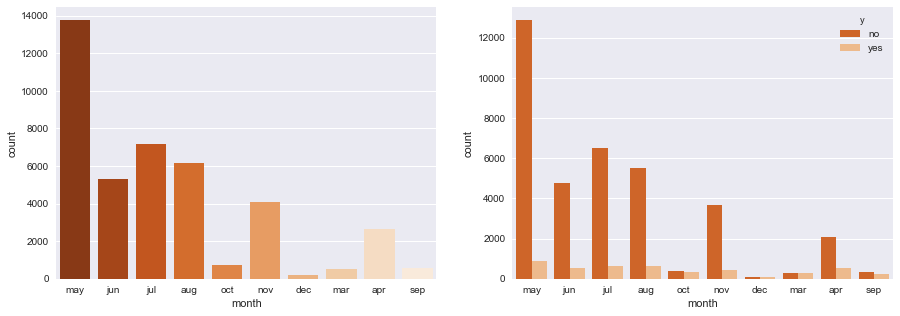

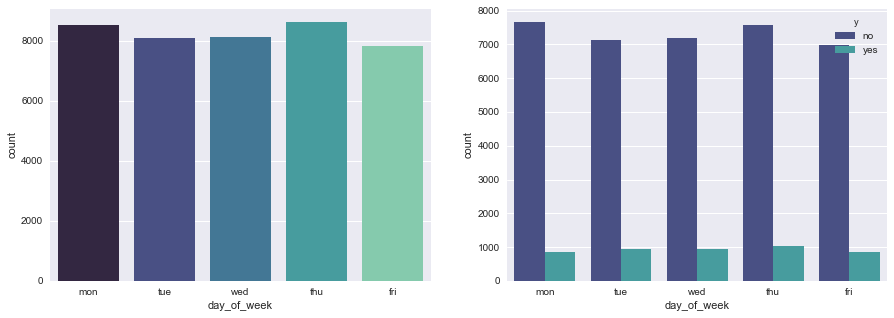

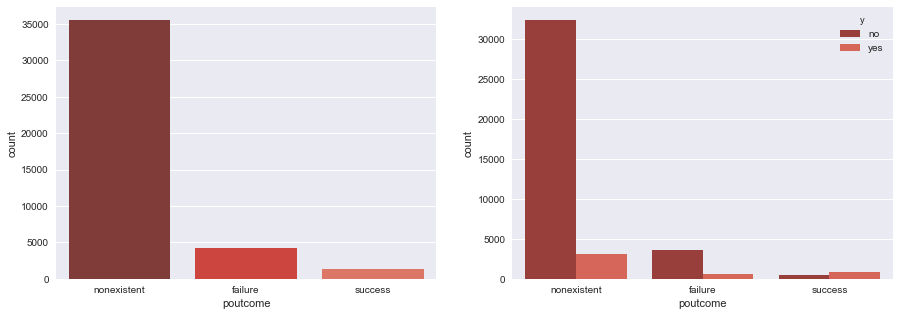

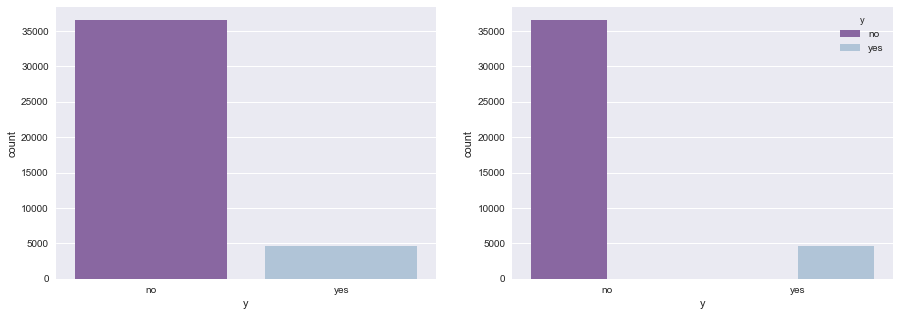

In [6]:
# Barplots for categorical (object) variables
column = "job"
colors = ['Blues_d', 'Reds_d', 'Greens_d', 'Oranges_d', 'Blues_r', 'Reds_r', 'Greens_r', 'Oranges_r', 'mako', 'Reds_d','BuPu_r']
color_coef=0
for column in dsdata.columns:
    if dsdata[column].dtype == "O":
        if column=='job' or column=='education':
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], ax=ax[0])
            t = t.set_xticklabels(dsdata[column], rotation=25)
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], ax=ax[1])
            t = g.set_xticklabels(dsdata[column], rotation=25)
        else:
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], ax=ax[0])
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], ax=ax[1])
        color_coef +=1

In [7]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {}".format(variable))
    ax = sns.distplot(dsdata[variable],color=sns.color_palette("RdYlGn_r")[0])
    
def histogram_by_deposit(feature):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {} with deposit".format(feature))
    ax0 = sns.distplot(dsdata[dsdata["y"]=="no"][feature],color=sns.color_palette("Pastel2")[0],label="deposit_No")
    ax1 = sns.distplot(dsdata[dsdata["y"]=="yes"][feature],color=sns.color_palette("Pastel2")[2],label="deposit_Yes")
    plt.legend()

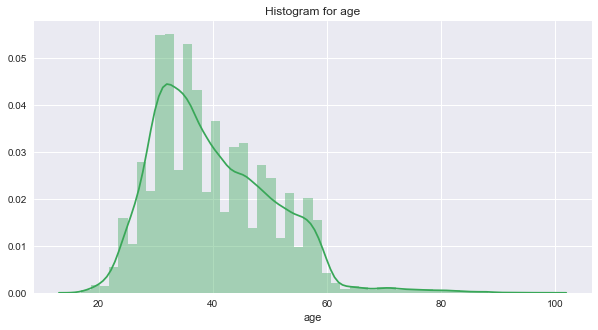

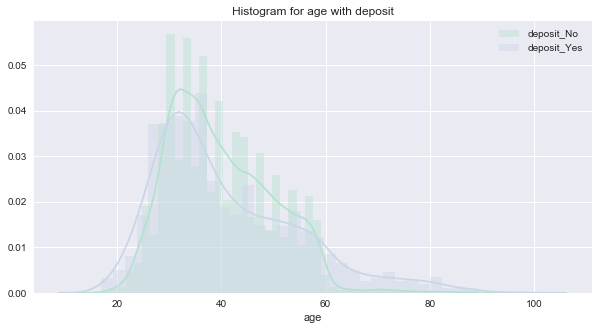

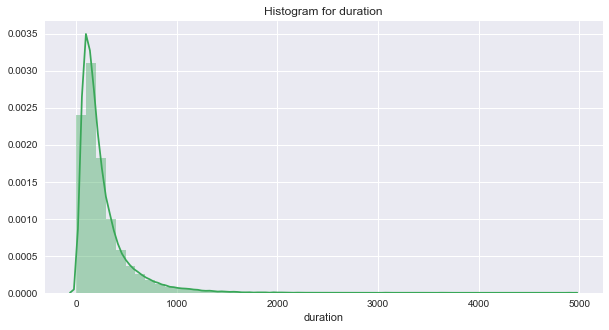

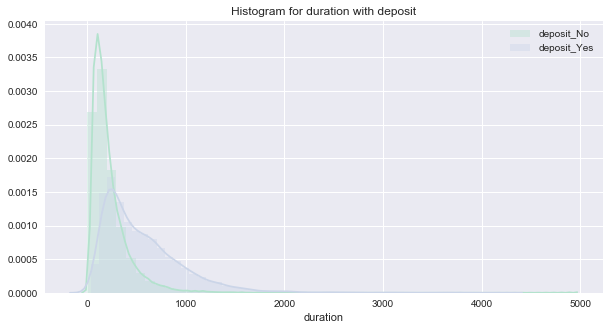

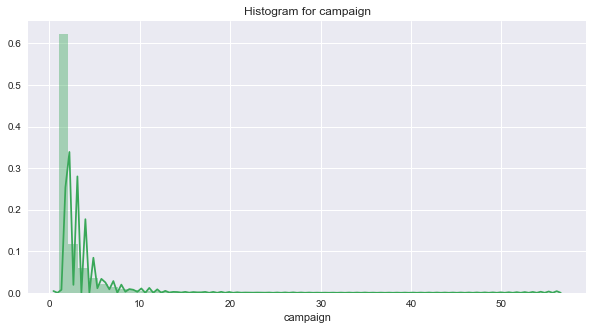

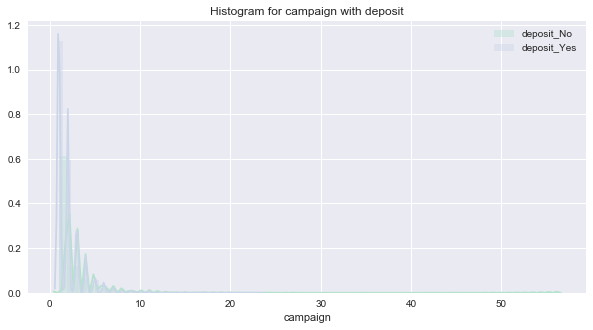

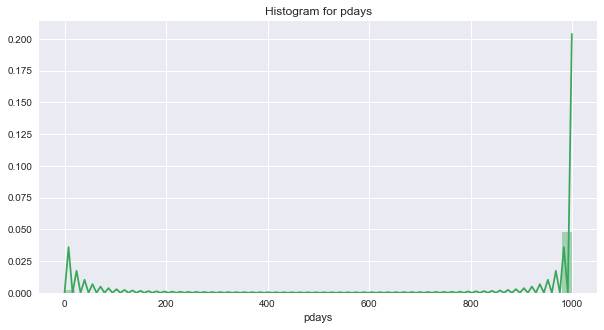

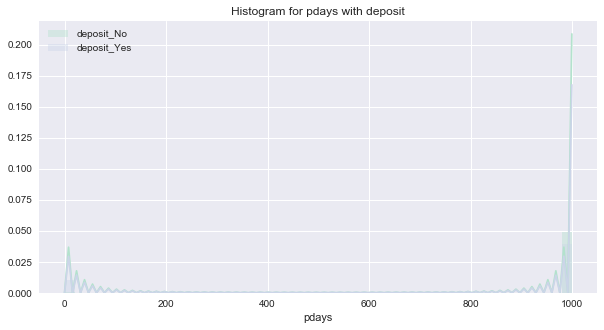

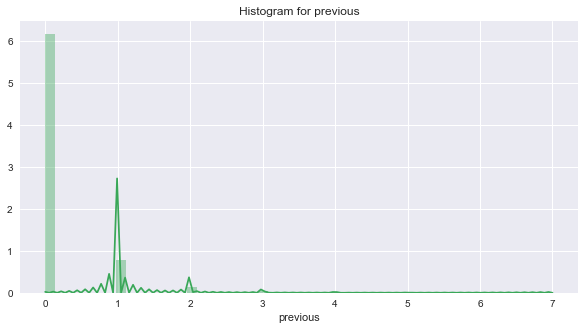

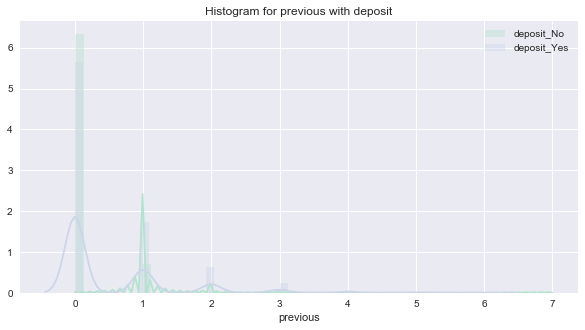

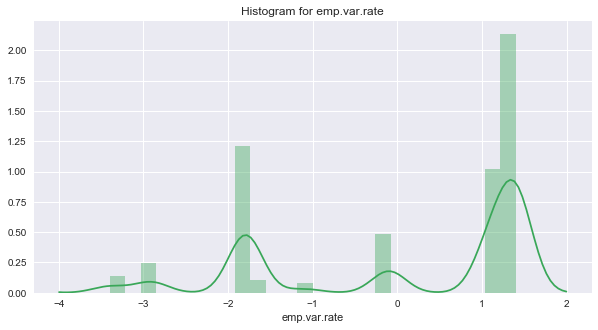

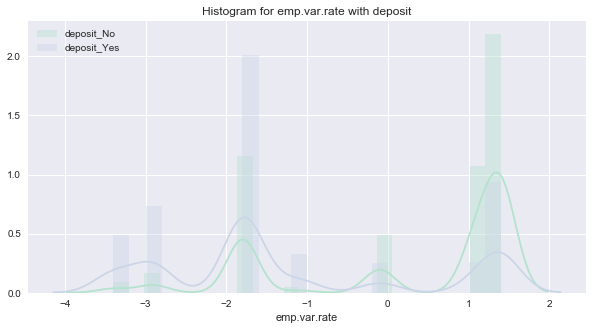

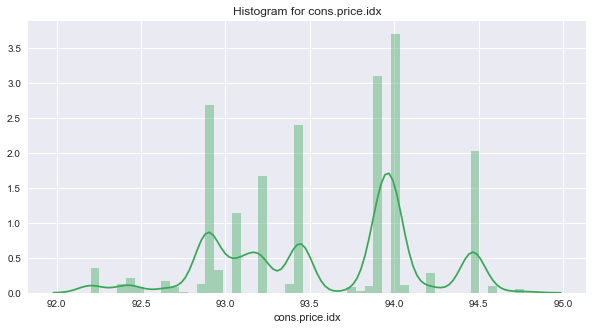

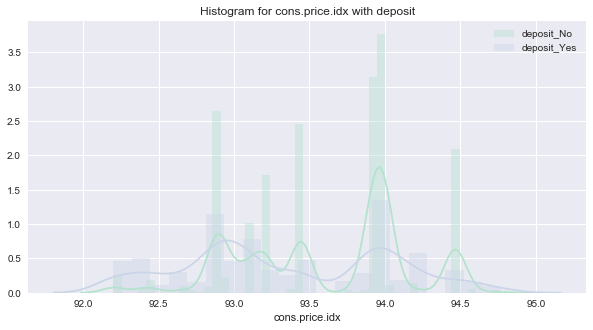

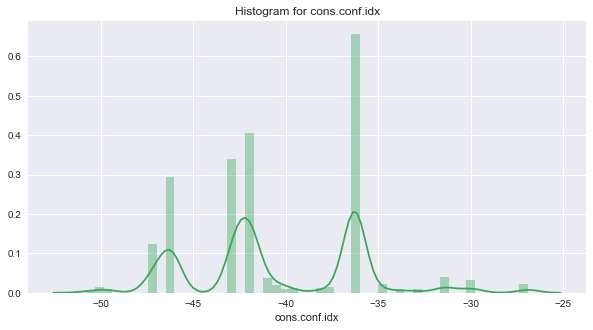

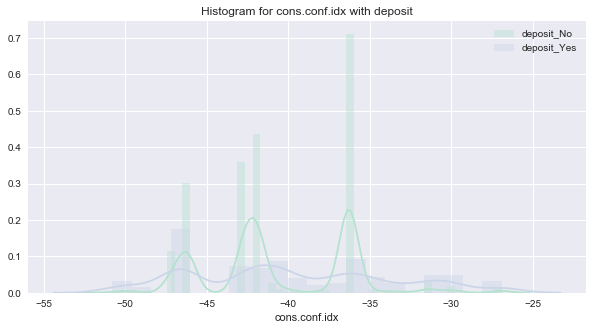

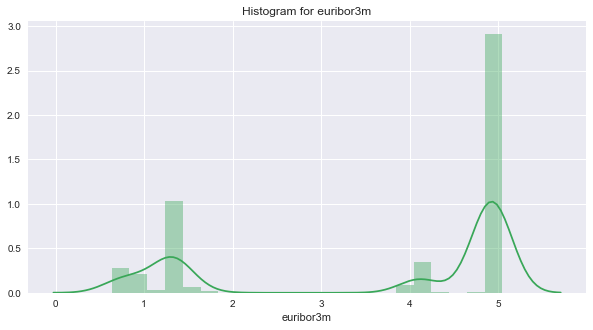

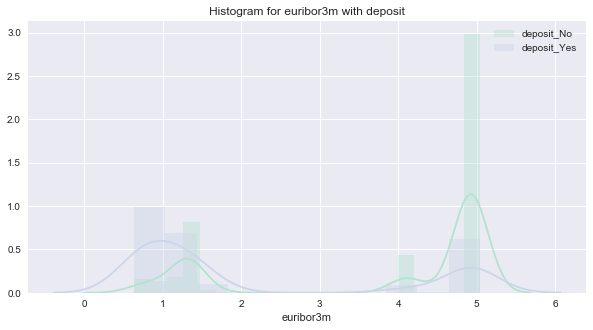

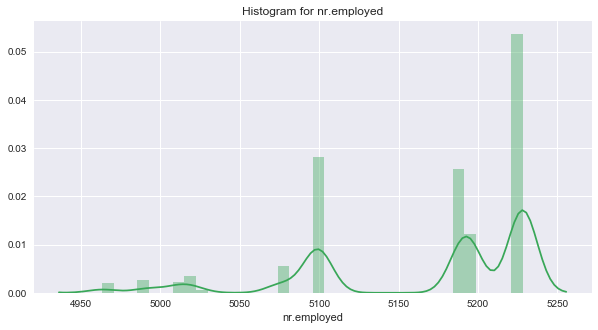

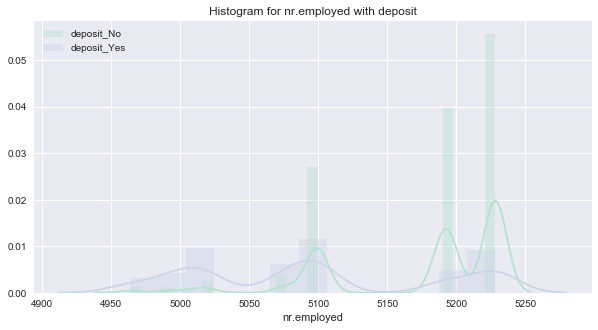

In [8]:
# histogram for numerical variables
column = "job"
for column in dsdata.columns:
    if dsdata[column].dtype == "int64" or dsdata[column].dtype == "float64":
        histogram(column)
        histogram_by_deposit(column)

# Feature Info

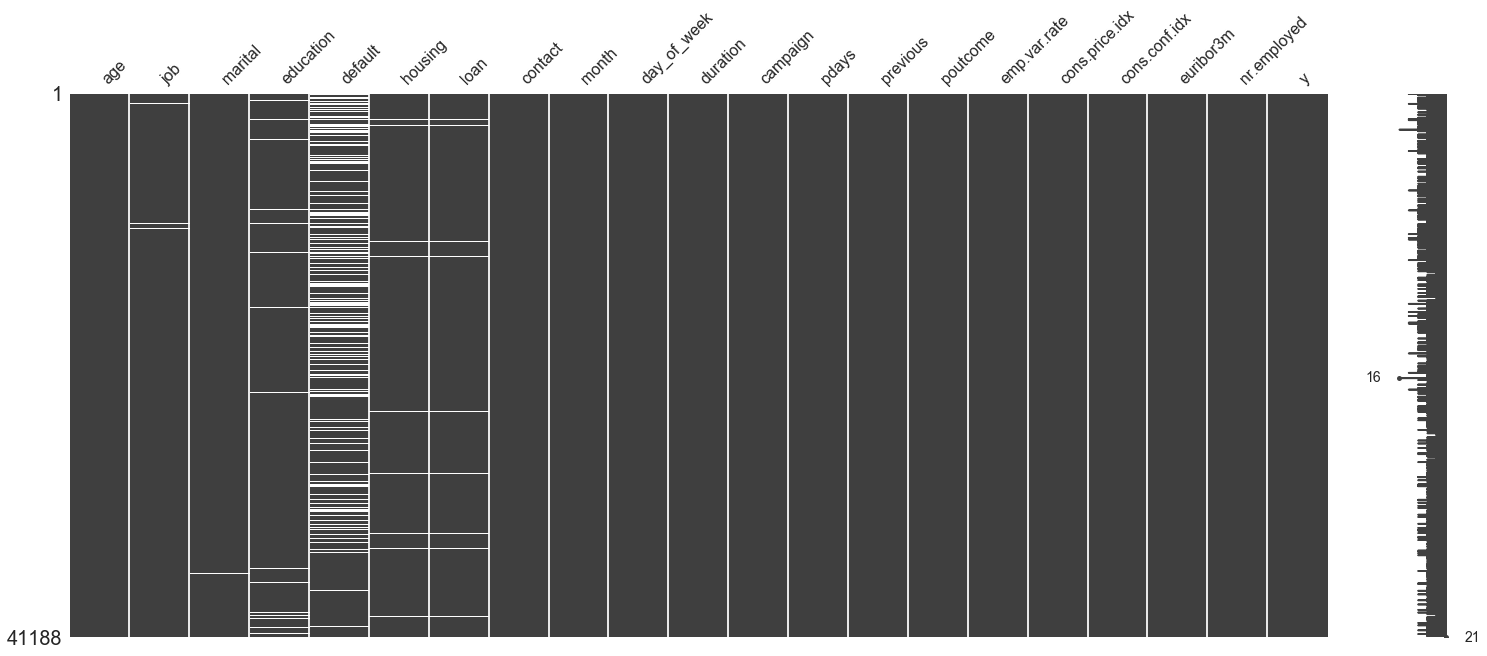

In [9]:
#visualizing missing data

msno.matrix(dsdata) 

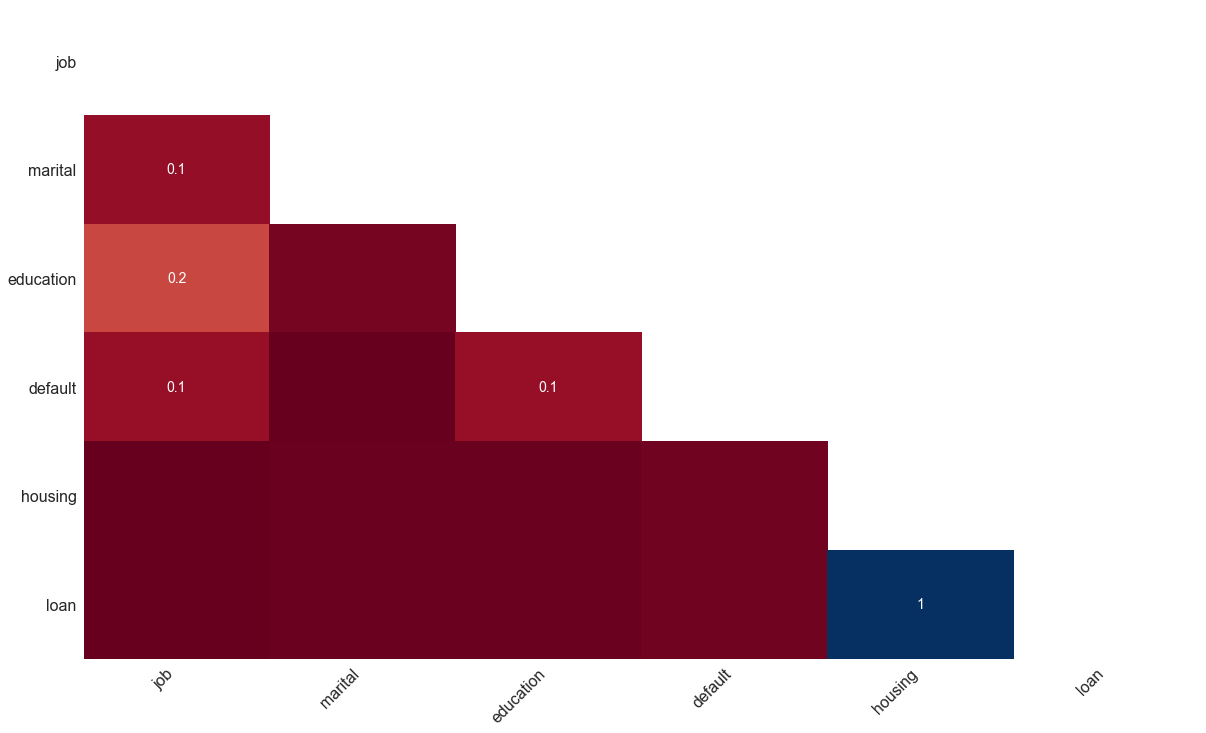

In [10]:
#nullity correlation: how strongly the presence or absence of one variable affects the presence of another

msno.heatmap(dsdata)

# Feature Engineering

In [11]:
# Data preparation
dsn = dsdata.copy()

# Drop missing value
dsn2 = dsn.copy().dropna()

In [12]:
# Create dummy

numvar = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
nonnumvar = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for c,var in enumerate(nonnumvar):  
    dummy = pd.get_dummies(dsn2[var],drop_first=True)
    dsn2 = dsn2.drop(columns=[var])
    dsn2 = pd.concat([dsn2, dummy], axis=1)

dsn2.info()
dsn2.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 48 columns):
age                    30488 non-null int64
duration               30488 non-null int64
campaign               30488 non-null int64
pdays                  30488 non-null int64
previous               30488 non-null int64
emp.var.rate           30488 non-null float64
cons.price.idx         30488 non-null float64
cons.conf.idx          30488 non-null float64
euribor3m              30488 non-null float64
nr.employed            30488 non-null float64
y                      30488 non-null object
blue-collar            30488 non-null uint8
entrepreneur           30488 non-null uint8
housemaid              30488 non-null uint8
management             30488 non-null uint8
retired                30488 non-null uint8
self-employed          30488 non-null uint8
services               30488 non-null uint8
student                30488 non-null uint8
technician             30488 non-null uint8


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [13]:
# Drop priori 
dsn3 = dsn2.drop(columns=['duration']) #remove output and duration, which should not be known a priori


In [14]:
# Data Normalization

# separate the data from the target attributes
X = dsn3.drop(columns=['y'])
#Y = pd.get_dummies(dsn3['y'],drop_first=True,dummy_na=True)

# normalize the data attributes
normalized_X = preprocessing.normalize(X)

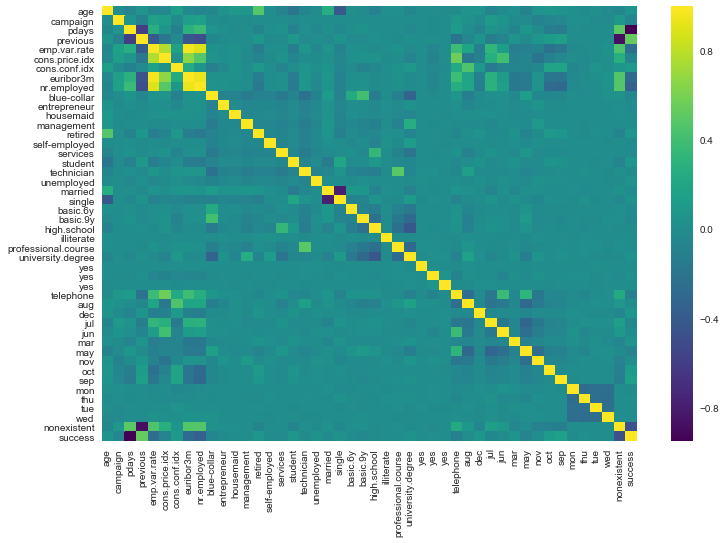

In [15]:
# Check the correlation

plt.figure(figsize=(12,8))
corr = dsn3.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,  cmap='viridis')
plt.show()

## Feature Selection

In [16]:
# drop maried (signle) option- too correlated
dsn4 = dsn3.copy()
dsn4 = dsn4.drop(columns=['single'])

# day_of_week - not relevant
dsn4 = dsn4.drop(columns=['mon','thu','tue','wed'])

#  poutcome - too correlated
dsn4 = dsn4.drop(columns=['failure','nonexistent','success'])

# macroeconomic - too correlated & May 2008 to November 2010 not significant
dsn4 = dsn4.drop(columns=['emp.var.rate', 'euribor3m', 'nr.employed'])

# pdays  - too correlated
dsn4 = dsn4.drop(columns=['pdays','previous'])


## Outlier Detection

### PCA 

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

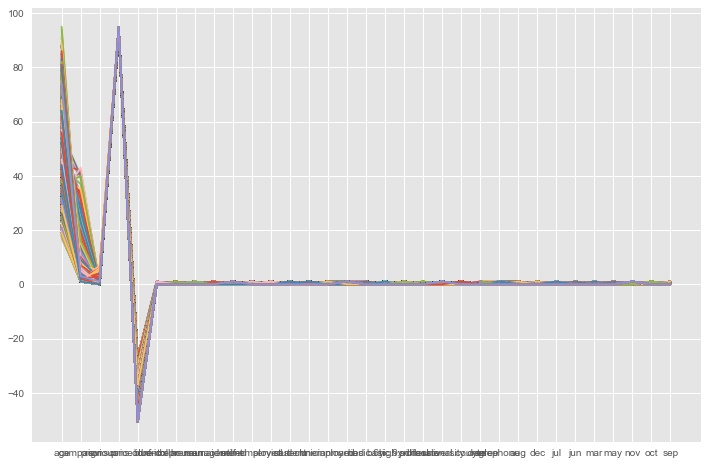

In [18]:
X = dsn4.drop(columns=['y'])

# Plot the data
fig = plt.figure(figsize=(12,8))
with plt.style.context(('ggplot')):
    plt.plot( X.T)
    plt.show()


In [19]:
pcaX = PCA().fit_transform(StandardScaler().fit_transform(X))
# PCA & score 

In [20]:
# Compute the euclidean distance ( 3 PC )
euclidean = np.zeros(X.shape[0])
for i in range(3):
    euclidean += (pcaX[:,i] - np.mean(pcaX[:,:3]))**2/np.var(pcaX[:,:3])

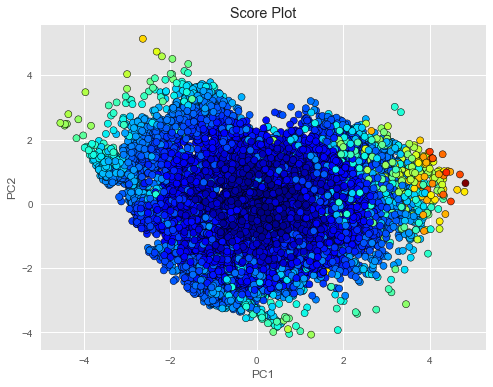

In [21]:
colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(pcaX[:, 0], pcaX[:, 1], c=colors, edgecolors='k')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
plt.show()



### Z-score

In [22]:
from scipy import stats

dsn5 = dsn4.copy()

zX = np.abs(stats.zscore(X))




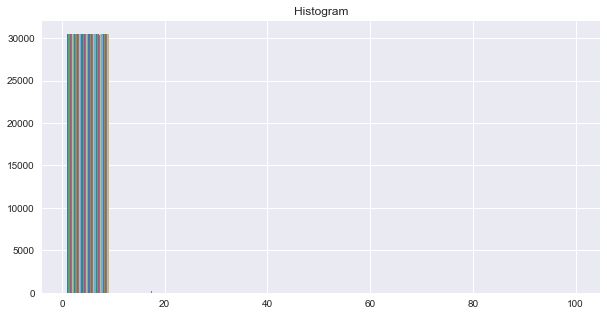

In [23]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram")
    ax = plt.hist(zX)

histogram(zX)

In [24]:
dsn5 = dsn5[(zX < 10).all(axis=1)]

dsn5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30279 entries, 0 to 41187
Data columns (total 36 columns):
age                    30279 non-null int64
campaign               30279 non-null int64
previous               30279 non-null int64
cons.price.idx         30279 non-null float64
cons.conf.idx          30279 non-null float64
y                      30279 non-null object
blue-collar            30279 non-null uint8
entrepreneur           30279 non-null uint8
housemaid              30279 non-null uint8
management             30279 non-null uint8
retired                30279 non-null uint8
self-employed          30279 non-null uint8
services               30279 non-null uint8
student                30279 non-null uint8
technician             30279 non-null uint8
unemployed             30279 non-null uint8
married                30279 non-null uint8
basic.6y               30279 non-null uint8
basic.9y               30279 non-null uint8
high.school            30279 non-null uint8
illite

In [33]:
X = dsn5.drop(columns=['y'])
Y = pd.get_dummies(dsn5['y'],drop_first=True)

#  Logistic Regression

,age,campaign,previous,cons.price.idx,cons.conf.idx,blue-collar,entrepreneur,housemaid,management,retired,...,telephone,aug,dec,jul,jun,mar,may,nov,oct,sep
count,30279.000000,30279.000000,30279.000000,30279.000000,30279.000000,30279.000000,30279.000000,30279.000000,30279.000000,30279.000000,...,30279.000000,30279.000000,30279.0,30279.000000,30279.000000,30279.000000,30279.000000,30279.000000,30279.000000,30279.000000
mean,38.988375,2.489646,0.191321,93.526847,-40.635886,0.186730,0.035800,0.022458,0.076026,0.039070,...,0.330163,0.154067,0.0,0.167146,0.118993,0.015919,0.321312,0.115228,0.021203,0.016348
std,10.280092,2.517017,0.514686,0.583837,4.772474,0.389701,0.185795,0.148169,0.265045,0.193765,...,0.470279,0.361019,0.0,0.373112,0.323786,0.125163,0.466988,0.319303,0.144062,0.126812
min,17.000000,1.000000,0.000000,92.201000,-50.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,1.000000,0.000000,93.075000,-42.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,2.000000,0.000000,93.444000,-41.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,3.000000,0.000000,93.994000,-36.400000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,95.000000,29.000000,5.000000,94.767000,-26.900000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,yes
count,30279.000000
mean,0.124839
std,0.330542
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


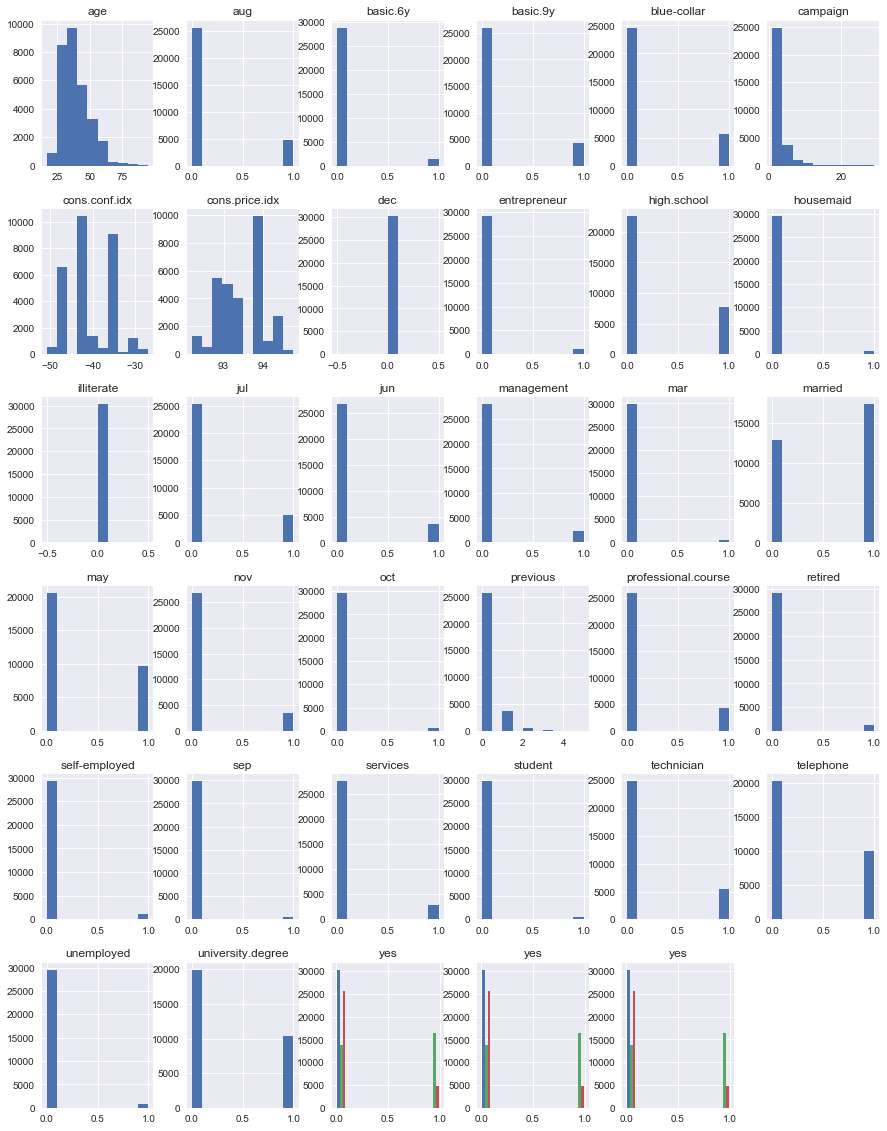

In [26]:
display(X.describe())
display(Y.describe())
X.hist(figsize=(15,20))
plt.show()

In [34]:
X=X.drop(columns = ['dec','illiterate','previous'])
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [40]:
logit = sm.Logit(Y, X).fit(method='CG')
display(logit.summary())

# Cannot converge 

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    yes   No. Observations:                30279
Model:                          Logit   Df Residuals:                    30248
Method:                           MLE   Df Model:                           30
Date:                Mon, 06 May 2019   Pseudo R-squ.:                     inf
Time:                        10:38:00   Log-Likelihood:                -20988.
converged:                      False   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                          0      0.001          0      1.000      -0.003       0.003
campaign                     0      0.005          0      1.000      -0.009       0.009
cons.price.idx               0      0.002          0      1.000      -0.004       0.004
cons.conf.idx                0      0.003          0      1.000      -0.007       0.007
blue-collar                  0      0.044          0      1.000      -0.086       0.086
entrepreneur                 0      0.065          0      1.000      -0.128       0.128
housemaid                    0      0.083          0      1.000      -0.163       0.163
management                   0      0.048          0      1.000      -0.094       0.094
retired                      0      0.073          0      1.000      -0.142       0.142
self-employed                0      0.065          0      1.000      -0.128       0.128
services                     0      0.046          0      1.000      -0.090       0.090
student                      0      0.088          0      1.000      -0.172       0.172
technician                   0      0.039          0      1.000      -0.077       0.077
unemployed                   0      0.078          0      1.000      -0.153       0.153
married                      0      0.025          0      1.000      -0.049       0.049
basic.6y                     0      0.069          0      1.000      -0.135       0.135
basic.9y                     0      0.053          0      1.000      -0.105       0.105
high.school                  0      0.054          0      1.000      -0.106       0.106
professional.course          0      0.059          0      1.000      -0.116       0.116
university.degree            0      0.055          0      1.000      -0.108       0.108
yes                          0   3.54e+06          0      1.000   -6.94e+06    6.94e+06
yes                          0      0.023          0      1.000      -0.045       0.045
yes                          0      0.032          0      1.000      -0.062       0.062
telephone                    0      0.034          0      1.000      -0.068       0.068
aug                          0      0.065          0      1.000      -0.128       0.128
jul                          0      0.055          0      1.000      -0.107       0.107
jun                          0      0.060          0      1.000      -0.117       0.117
mar                          0      0.102          0      1.000      -0.199       0.199
may                          0      0.051          0      1.000      -0.101       0.101
nov                          0      0.058          0      1.000      -0.114       0.114
oct                          0      0.098          0      1.000      -0.192       0.192
sep                          0      0.108          0      1.000      -0.212       0.212
=======================================================================================
"""

# Classification

In [43]:
def plot_hist2(df,df2,df_col):
    df = df.dropna()  
    df2 = df2.dropna() 
    for d in df_col:
        print("Empirical Distribution of Variable "+d)
        fig, axes = plt.subplots(1,2,figsize=(15,9))
        sns.distplot(df[d],ax=axes[0])
        sns.distplot(df2[d],ax=axes[1])
        axes[0].set_ylabel("Probability")
        axes[1].set_ylabel("Probability")
        plt.suptitle("Empirical Probability Distribution of Numerical Variable "+d)
        plt.show()
        
def get_num_cols(df):
    idx = df.select_dtypes(exclude='object').columns.values
    dF = df[idx].dropna() #remove NaNs or else it cant plot
    return dF.columns

def calculate_metrics(y_test,y_hat):
    c = confusion_matrix(y_test, y_hat)
    print("Confusion matrix is:")
    print(c)
    print("We have",c[0][0]+c[1][1],"correct observations and",c[0][1]+c[1][0], "misclassifications.")
    print(classification_report(y_test, y_hat))
    
def plot_ROC(y_test,X_test,classifier):
    roc = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr, label='Classifier area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.25)

In [47]:
# Try

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for c,var in enumerate(classifiers):
    clf = var
    clf = clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    print(c,var,"Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

0 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') Accuracy: 0.8760898282694848
1 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) Accuracy: 0.8797886393659181
2 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') Accuracy: 0.8343461030383091
3 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impu

### AdaBoost Classifier

Test accuracy: 0.881 , Cross Entropy Loss is: 4.1109056634391274
Confusion matrix is:
[[6496  148]
 [ 753  173]]
We have 6669 correct observations and 901 misclassifications.
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      6644
          1       0.54      0.19      0.28       926

avg / total       0.85      0.88      0.85      7570



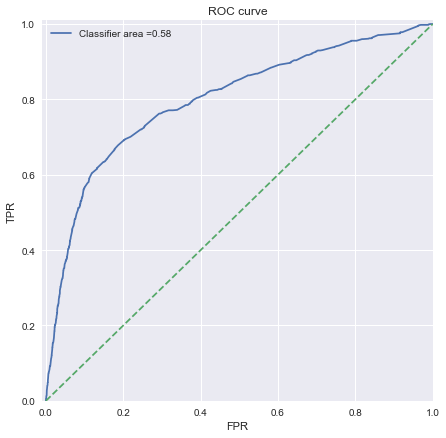

In [48]:
clf_rdfore = AdaBoostClassifier()
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)

### SVC 

Test accuracy: 0.88 , Cross Entropy Loss is: 4.151960170832456
Confusion matrix is:
[[6579   65]
 [ 845   81]]
We have 6660 correct observations and 910 misclassifications.
             precision    recall  f1-score   support

          0       0.89      0.99      0.94      6644
          1       0.55      0.09      0.15       926

avg / total       0.85      0.88      0.84      7570



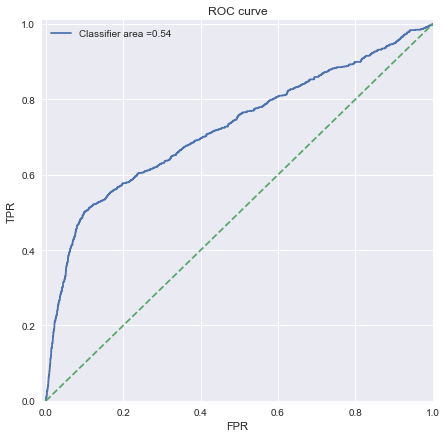

In [50]:
clf_rdfore = SVC(probability=True)
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)



In [ ]:
model = sm.OLS(Y.values,X.values).fit()

print("Distribution of OLS residuals")
sns.distplot(model.resid)
plt.show()
display(model.summary())

def print_VIF(X):
    colnames = list(X.columns)
    for i in range(X.shape[1]):
        print(oi.variance_inflation_factor(X.values, i), colnames[i])
        
print("Variance Inflation Factors:")        
print_VIF(X)


X_train, X_test, Y_train, Y_test = train_test_split(X3.values, Y.values, test_size=0.25)

reg = LinearRegression()
reg = reg.fit(X_train,Y_train)

y_hat = reg.predict(X_test)

print('Test accuracy:',np.round(reg.score(X_test, Y_test),3), ', MSE Loss is:', mean_squared_error(Y_test,y_hat))